https://github.com/emiliom/stuff/blob/master/pyoos_ndbc_demo.ipynb

# pyoos NDBC demo
Demo the capabilities of the pyoos [NdbcSos collector](https://github.com/ioos/pyoos/blob/master/pyoos/collectors/ndbc/ndbc_sos.py).   
Starting point was a notebook from [Filipe](https://github.com/ocefpaf), for the [OOI Endurance Array](http://oceanobservatories.org/array/coastal-endurance/), which has a spatial extent encompassed within the NANOOS domain.   
12/23/2015. [Emilio Mayorga](https://github.com/emiliom/), [NANOOS](http://nanoos.org)

In [1]:
import pandas as pd

from pyoos.collectors.ndbc.ndbc_sos import NdbcSos
import owslib.swe.sensor.sml as owslibsml

fmt = '{:*^64}'.format

## Set pyoos filter criteria

In [2]:
# OOI Endurance Array bounding box
bbox = [-127, 43, -123.75, 48]

In [3]:
from datetime import datetime, timedelta

dt = 5  # days

now = datetime.utcnow()
start = now - timedelta(days=dt)
stop = now + timedelta(days=dt)

In [4]:
sos_name = 'sea_water_temperature'

## Instantiate and configure (filter) NdbcSos collector

In [5]:
collector_ndbc = NdbcSos()

collector_ndbc.set_bbox(bbox)
collector_ndbc.end_time = stop
collector_ndbc.start_time = start
collector_ndbc.variables = [sos_name]

ofrs = collector_ndbc.server.offerings
title = collector_ndbc.server.identification.title

print(fmt(' NDBC Collector offerings '))
print('{}: {} offerings'.format(title, len(ofrs)))

******************* NDBC Collector offerings *******************
National Data Buoy Center SOS: 964 offerings


Note that the filters set on the collector don't apply to the server offerings. `server` shows everything available. That's why there are 964 offerings.

### FYI: Information available from each offering
Sparse but useful metadata. No filtering of any kind applied yet.

In [6]:
# 'offering' is a list; here's one entry
ofr1 = collector_ndbc.server.offerings[1]
vars(ofr1)

{'_root': <Element {http://www.opengis.net/sos/1.0}ObservationOffering at 0x7f790f9e97a0>,
 'bbox': (-87.313, 44.794, -87.313, 44.794),
 'bbox_srs': urn:ogc:def:crs:EPSG::4326,
 'begin_position': datetime.datetime(2012, 5, 31, 23, 40, tzinfo=tzutc()),
 'description': 'Sturgeon Bay CG Station, WS',
 'end_position': datetime.datetime(2015, 8, 18, 11, 40, tzinfo=tzutc()),
 'features_of_interest': ['urn:cgi:Feature:CGI:EarthOcean'],
 'id': 'station-0y2w3',
 'name': 'urn:ioos:station:wmo:0y2w3',
 'observed_properties': ['http://mmisw.org/ont/cf/parameter/air_temperature',
  'http://mmisw.org/ont/cf/parameter/air_pressure_at_sea_level',
  'http://mmisw.org/ont/cf/parameter/sea_water_temperature',
  'http://mmisw.org/ont/cf/parameter/winds'],
 'procedures': ['urn:ioos:station:wmo:0y2w3'],
 'response_formats': ['text/xml;subtype="om/1.0.0"',
  'text/csv',
  'text/tab-separated-values',
  'application/vnd.google-earth.kml+xml',
  'text/xml;schema="ioos/0.6.1"',
  'application/ioos+xml;version=0

In [7]:
ofr1.id, ofr1.name, ofr1.procedures

('station-0y2w3', 'urn:ioos:station:wmo:0y2w3', ['urn:ioos:station:wmo:0y2w3'])

In [8]:
# 'content' is a dictionary; here's one entry
vars(collector_ndbc.server.contents['station-46211'])

{'_root': <Element {http://www.opengis.net/sos/1.0}ObservationOffering at 0x7f790f9f3a28>,
 'bbox': (-124.244, 46.857, -124.244, 46.857),
 'bbox_srs': urn:ogc:def:crs:EPSG::4326,
 'begin_position': datetime.datetime(2009, 5, 14, 14, 26, tzinfo=tzutc()),
 'description': 'Grays Harbor, WA (036)',
 'end_position': datetime.datetime(2015, 12, 24, 0, 50, 43, 893170),
 'features_of_interest': ['urn:cgi:Feature:CGI:EarthOcean'],
 'id': 'station-46211',
 'name': 'urn:ioos:station:wmo:46211',
 'observed_properties': ['http://mmisw.org/ont/cf/parameter/sea_water_temperature',
  'http://mmisw.org/ont/cf/parameter/waves'],
 'procedures': ['urn:ioos:station:wmo:46211'],
 'response_formats': ['text/xml;subtype="om/1.0.0"',
  'text/csv',
  'text/tab-separated-values',
  'application/vnd.google-earth.kml+xml',
  'text/xml;schema="ioos/0.6.1"',
  'application/ioos+xml;version=0.6.1'],
 'response_modes': ['inline'],
 'result_model': 'om:ObservationCollection',
 'srs': urn:ogc:def:crs:EPSG::4326}

## Apply collector `raw` method
The result is the filtered time series data. But that information will also be used to extract the set of stations returned, then issue a collector `metadata` request.

In [9]:
collector_ndbc_raw = collector_ndbc.raw(responseFormat="text/csv")

`collector_ndbc_raw` is the entire `csv` string.

In [10]:
type(collector_ndbc_raw), len(collector_ndbc_raw)

(str, 220604)

In [11]:
# See a piece of the csv
ndbc_raw_lst = collector_ndbc_raw.splitlines()
len(ndbc_raw_lst)

2058

In [12]:
ndbc_raw_lst[:5]

['station_id,sensor_id,"latitude (degree)","longitude (degree)",date_time,"depth (m)","sea_water_temperature (C)"',
 'urn:ioos:station:wmo:46029,urn:ioos:sensor:wmo:46029::watertemp1,46.14,-124.51,2015-12-19T01:50:00Z,0.60,11.40',
 'urn:ioos:station:wmo:46029,urn:ioos:sensor:wmo:46029::watertemp1,46.14,-124.51,2015-12-19T02:50:00Z,0.60,11.40',
 'urn:ioos:station:wmo:46029,urn:ioos:sensor:wmo:46029::watertemp1,46.14,-124.51,2015-12-19T03:50:00Z,0.60,11.40',
 'urn:ioos:station:wmo:46029,urn:ioos:sensor:wmo:46029::watertemp1,46.14,-124.51,2015-12-19T04:50:00Z,0.60,11.40']

Read the time series data into a DataFrame; but keep only the information/columns we'll use for plotting.

In [13]:
from StringIO import StringIO

datacsv_df = pd.read_csv(StringIO(collector_ndbc_raw.encode('utf-8')), 
                         parse_dates=True)
columns = {'station_id': 'station',
           'depth (m)': 'depth_m',
           'sea_water_temperature (C)': sos_name}
           
datacsv_df.rename(columns=columns, inplace=True)
datacsv_df['station'] = [s.split(':')[-1] for s in datacsv_df['station']]
datacsv_df.drop(['sensor_id', 'latitude (degree)', 'longitude (degree)'], 
                axis=1, inplace=True)

datacsv_df.head(10)

,station,date_time,depth_m,sea_water_temperature
0,46029,2015-12-19T01:50:00Z,0.6,11.4
1,46029,2015-12-19T02:50:00Z,0.6,11.4
2,46029,2015-12-19T03:50:00Z,0.6,11.4
3,46029,2015-12-19T04:50:00Z,0.6,11.4
4,46029,2015-12-19T05:50:00Z,0.6,11.4
5,46029,2015-12-19T06:50:00Z,0.6,11.4
6,46029,2015-12-19T07:50:00Z,0.6,11.4
7,46029,2015-12-19T08:50:00Z,0.6,11.4
8,46029,2015-12-19T09:50:00Z,0.6,11.4
9,46029,2015-12-19T10:50:00Z,0.6,11.3


### Extract unique station id's as a list
To be reused with the collector `metadata` method, next.

In [14]:
stations = list(datacsv_df.station.unique())
len(stations), stations

(11,
 ['46029',
  '46041',
  '46050',
  '46089',
  '46211',
  '46229',
  '46243',
  '46248',
  'jtaw1',
  'sefo3',
  'seto3'])

## Extract station information using collector `metadata` method

In [15]:
descsen = collector_ndbc.server.get_operation_by_name('describesensor')
descsen.parameters

{'outputFormat': {'values': ['text/xml;subtype="sensorML/1.0.1"']}}

In [16]:
# The metadata method for the NdbcSos collector expects
# features to be in the shortened, "station wmo id" form (eg, 46098),
# rather than the offering name (eg, station-46089) 
# or the station urn (eg, urn:ioos:station:wmo:46089)
output_format = descsen.parameters['outputFormat']['values'][0]
collector_ndbc.features = stations
ndbc_md_lst = collector_ndbc.metadata(output_format=output_format)
type(ndbc_md_lst), len(ndbc_md_lst), ndbc_md_lst[0]

(list, 11, <owslib.swe.sensor.sml.SensorML at 0x7f79119ee390>)

In [17]:
for sml in ndbc_md_lst:
    print sml.members[0].identifiers['stationId'].value

urn:ioos:station:wmo:46029
urn:ioos:station:wmo:46041
urn:ioos:station:wmo:46050
urn:ioos:station:wmo:46089
urn:ioos:station:wmo:46211
urn:ioos:station:wmo:46229
urn:ioos:station:wmo:46243
urn:ioos:station:wmo:46248
urn:ioos:station:wmo:jtaw1
urn:ioos:station:wmo:sefo3
urn:ioos:station:wmo:seto3


One of the SensorML responses, for illustration. The corresponding url for the DecribeSensor request for sta0_sml is http://sdf.ndbc.noaa.gov/sos/server.php?request=DescribeSensor&service=SOS&version=1.0.0&outputformat=text/xml;subtype=%22sensorML/1.0.1%22&procedure=urn:ioos:station:wmo:46211

In [18]:
sta0_sml = ndbc_md_lst[4].members[0]
sta0_sml

In [19]:
vars(sta0_sml)

{'capabilities': {'ioosServiceMetadata': <Element {http://www.opengis.net/swe/1.0.1}SimpleDataRecord at 0x7f790ee17cb0>},
 'characteristics': {},
 'classifiers': {'platformType': <owslib.swe.sensor.sml.Classifier at 0x7f790edab7d0>,
  'publisher': <owslib.swe.sensor.sml.Classifier at 0x7f790edab750>},
 'components': [<Element {http://www.opengis.net/sensorML/1.0.1}component at 0x7f790ee177e8>,
  <Element {http://www.opengis.net/sensorML/1.0.1}component at 0x7f790ee177a0>],
 'connections': [],
 'contacts': {'http://mmisw.org/ont/ioos/definition/operator': <owslib.swe.sensor.sml.Contact at 0x7f790edab910>,
  'http://mmisw.org/ont/ioos/definition/publisher': <owslib.swe.sensor.sml.Contact at 0x7f790edab990>},
 'description': 'Station metadata for 46211 - Grays Harbor, WA (036)',
 'documentation': [<owslib.swe.sensor.sml.Documentation at 0x7f790edab310>],
 'gmlBoundedBy': None,
 'history': {},
 'identifiers': {'longName': <owslib.swe.sensor.sml.Identifier at 0x7f790edab850>,
  'shortName':

Available contacts roles, identifiers, and classifiers:

In [20]:
sta0_sml.contacts.keys(), sta0_sml.identifiers.keys(), sta0_sml.classifiers.keys()

(['http://mmisw.org/ont/ioos/definition/operator',
  'http://mmisw.org/ont/ioos/definition/publisher'],
 ['stationId', 'shortName', 'longName'],
 ['publisher', 'platformType'])

### Extract and transform the desired station metadata, then create DataFrame

In [21]:
stations_md_rec = []
for sta_sml_members in ndbc_md_lst:
    sta_sml = sta_sml_members.members[0]
    station_urn = sta_sml.identifiers['stationId'].value
    # The XPath for the location/point coordinates doesn't follow
    # the IOOS SOS convention.
    loc_str = sta_sml.location.find(owslibsml.nsp('gml:Point/gml:coordinates')).text
    # In some cases the platform type XML element seems to be missing ...
    if 'platformType' in sta_sml.classifiers:
        platform_type = sta_sml.classifiers['platformType'].value
    else:
        platform_type = 'Unknown'
    
    sta_md = dict(
        station_id = station_urn.split(':')[-1],
        station_urn = station_urn,
        # Long name is also available in the offering as the offering description
        longname = sta_sml.identifiers['longName'].value,
        lat = float(loc_str.split()[0]),
        lon = float(loc_str.split()[1]),
        operator = sta_sml.contacts['http://mmisw.org/ont/ioos/definition/operator'].organization,
        platform_type = platform_type
    )
    stations_md_rec.append(sta_md)

In [22]:
stations_df = pd.DataFrame.from_records(stations_md_rec, index='station_id')
print "Number of stations: %d" % len(stations_df)
stations_df.head(20)

Number of stations: 11


,lat,lon,longname,operator,platform_type,station_urn
station_id,,,,,,
46029,46.140,-124.510,COL RIVER BAR - 78NM South Southwest of Aberde...,National Data Buoy Center,MOORED BUOY,urn:ioos:station:wmo:46029
46041,47.340,-124.750,"CAPE ELIZABETH- 45NM Northwest of Aberdeen, WA",National Data Buoy Center,Unknown,urn:ioos:station:wmo:46041
46050,44.640,-124.500,"STONEWALL BANKS - 20NM West of Newport, OR",National Data Buoy Center,Unknown,urn:ioos:station:wmo:46050
46089,45.910,-125.760,"Tillamook, OR",National Data Buoy Center,MOORED BUOY,urn:ioos:station:wmo:46089
46211,46.857,-124.244,"Grays Harbor, WA (036)",SCRIPPS,MOORED BUOY,urn:ioos:station:wmo:46211
46229,43.769,-124.551,"UMPQUA OFFSHORE, OR (139)",SCRIPPS,MOORED BUOY,urn:ioos:station:wmo:46229
46243,46.200,-124.117,"Clatsop Spit, OR - 162",SCRIPPS,MOORED BUOY,urn:ioos:station:wmo:46243
46248,46.133,-124.667,"Astoria Canyon, OR (179)",SCRIPPS,Unknown,urn:ioos:station:wmo:46248
jtaw1,46.266,-124.038,"Jetty A, USCG Station Disappointment",Center for Coastal Margin Observation and Pred...,Unknown,urn:ioos:station:wmo:jtaw1


## Plot the time series

In [23]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

/home/mayorga/miniconda/envs/ioos_source/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


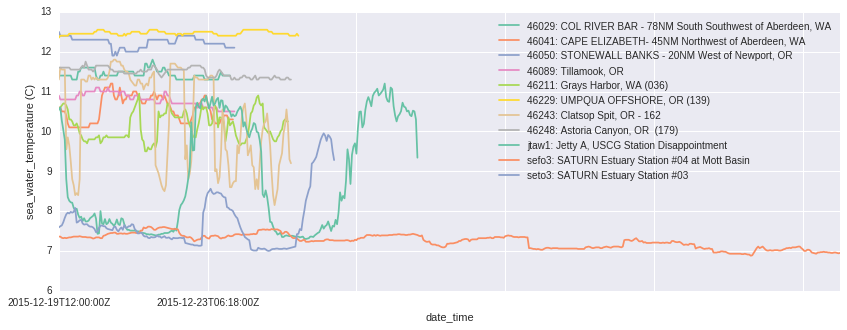

In [24]:
fig, ax = plt.subplots(figsize=(14, 5))

colors = seaborn.color_palette("Set2", len(stations))
for k, station in enumerate(stations):
    stadatadf = datacsv_df[datacsv_df.station == station]
    stadatadf = stadatadf.set_index('date_time')
    stamddf = stations_df.ix[station]
    label = "%s: %s" % (station, stamddf.longname)
    stadatadf[sos_name].plot(ax=ax, label=label, color=colors[k])
ax.legend(bbox_to_anchor=(1, 1))
ax.set_ylabel(sos_name + ' (C)');

The `sefo3` station can predict the future!

--------------------------------------------------------

## Postscript: The collector `collect` method
It hasn't been customized for NdbcSos, so it is not very useful yet.

In [25]:
# The argument offerings=['urn:ioos:network:noaa.nws.ndbc:all'] is not needed.
# It is passed by default.
collector_ndbc_collect = collector_ndbc.collect(responseFormat='text/xml;subtype="om/1.0.0"')
type(collector_ndbc_collect), len(collector_ndbc_collect), collector_ndbc_collect[0]

NDBC does not support filtering by > 1 station at a time... returning all stations.


(list,
 11,
 <pyoos.parsers.ioos.one.get_observation.OmObservation at 0x7f79012c1090>)

In [26]:
for s in collector_ndbc_collect:
    print s.description

Observed sea_water_temperature at urn:ioos:station:wmo:46029, COL RIVER BAR - 78NM South Southwest of Aberdeen, WA
Observed sea_water_temperature at urn:ioos:station:wmo:46041, CAPE ELIZABETH- 45NM Northwest of Aberdeen, WA
Observed sea_water_temperature at urn:ioos:station:wmo:46050, STONEWALL BANKS - 20NM West of Newport, OR
Observed sea_water_temperature at urn:ioos:station:wmo:46089, Tillamook, OR
Observed sea_water_temperature at urn:ioos:station:wmo:46211, Grays Harbor, WA (036)
Observed sea_water_temperature at urn:ioos:station:wmo:46229, UMPQUA OFFSHORE, OR (139)
Observed sea_water_temperature at urn:ioos:station:wmo:46243, Clatsop Spit, OR - 162
Observed sea_water_temperature at urn:ioos:station:wmo:46248, Astoria Canyon, OR  (179)
Observed sea_water_temperature at urn:ioos:station:wmo:jtaw1, Jetty A, USCG Station Disappointment
Observed sea_water_temperature at urn:ioos:station:wmo:sefo3, SATURN Estuary Station #04 at Mott Basin
Observed sea_water_temperature at urn:ioos:stat

In [27]:
# The feature object property is not populated, 
# so the time series data are not parsed and made available
ncc=collector_ndbc_collect[0]
vars(ncc)

{'_root': <Element {http://www.opengis.net/om/1.0}Observation at 0x7f790131e908>,
 'bbox': <shapely.geometry.polygon.Polygon at 0x7f79012c1410>,
 'bbox_srs': urn:ogc:def:crs:EPSG::4326,
 'begin_position': datetime.datetime(2015, 12, 19, 0, 51, tzinfo=tzutc()),
 'description': 'Observed sea_water_temperature at urn:ioos:station:wmo:46029, COL RIVER BAR - 78NM South Southwest of Aberdeen, WA',
 'end_position': datetime.datetime(2015, 12, 24, 0, 2, tzinfo=tzutc()),
 'feature': None,
 'feature_type': 'timeSeries',
 'location': {'urn:ioos:station:wmo:46029': <shapely.geometry.point.Point at 0x7f79012c1550>},
 'location_srs': urn:ogc:def:crs:EPSG::4326,
 'observedProperties': ['http://mmisw.org/ont/cf/parameter/sea_water_temperature'],
 'procedures': ['urn:ioos:station:wmo:46029'],
 'results': <Element {http://www.opengis.net/om/1.0}result at 0x7f790f9c8320>}